# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Cifar10 Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2
import csv
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from skimage import *
import gc
import math
%matplotlib inline




In [2]:
# TODO: Fill this in based on where you saved the training and testing data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.3)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

image_size = X_train.shape[1]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 35000
Number of validation examples = 15000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

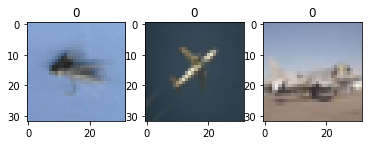

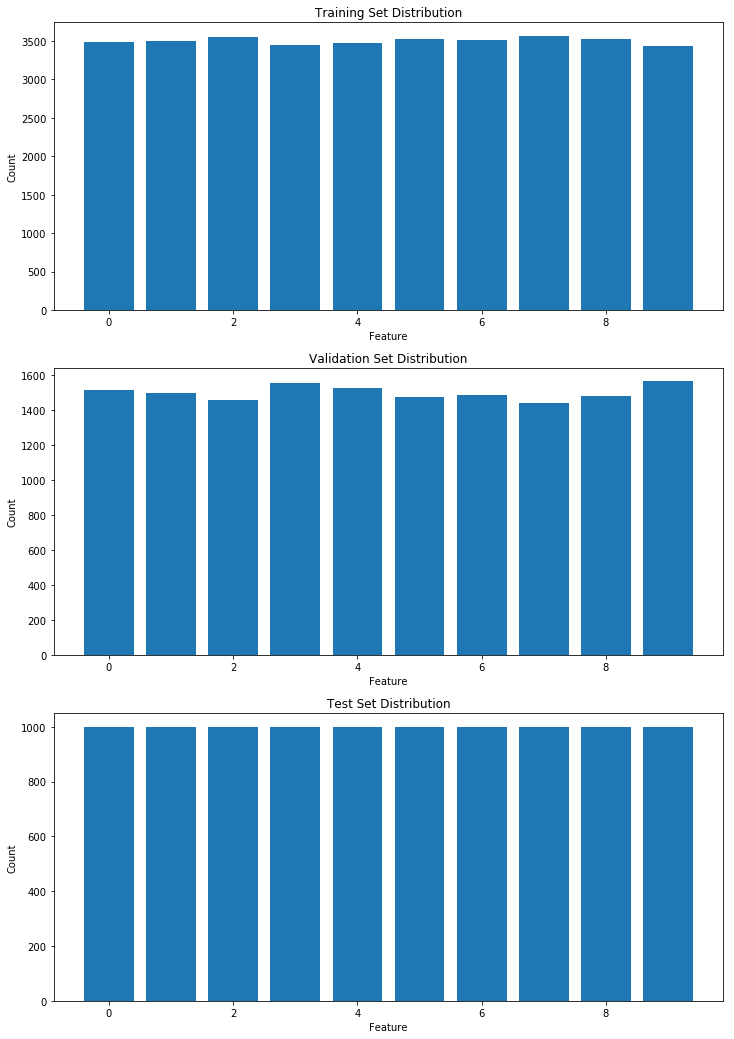

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
i = np.random.randint(0, len(X_train))
j = np.random.randint(0, len(X_valid))
k = np.random.randint(0, len(X_test))

plt.figure(figsize = (6,2))
plt.subplot(1,3,1)
plt.imshow(X_train[i])
plt.title(y_train[i])

plt.subplot(1,3,2)
plt.imshow(X_valid[j])
plt.title(y_valid[j])

plt.subplot(1,3,3)
plt.imshow(X_test[k])
plt.title(y_test[k])

unique1, counts1 = np.unique(y_train, return_counts = True)
unique2, counts2 = np.unique(y_valid, return_counts = True)
unique3, counts3 = np.unique(y_test, return_counts = True)

plt.figure(figsize = (12, 18))
plt.subplot(3, 1, 1)
plt.bar(unique1, counts1)
plt.title("Training Set Distribution")
plt.xlabel("Feature")
plt.ylabel("Count")

plt.subplot(3, 1, 2)
plt.bar(unique2, counts2)
plt.title("Validation Set Distribution")
plt.xlabel("Feature")
plt.ylabel("Count")

plt.subplot(3, 1, 3)
plt.bar(unique3, counts3)
plt.title("Test Set Distribution")
plt.xlabel("Feature")
plt.ylabel("Count")

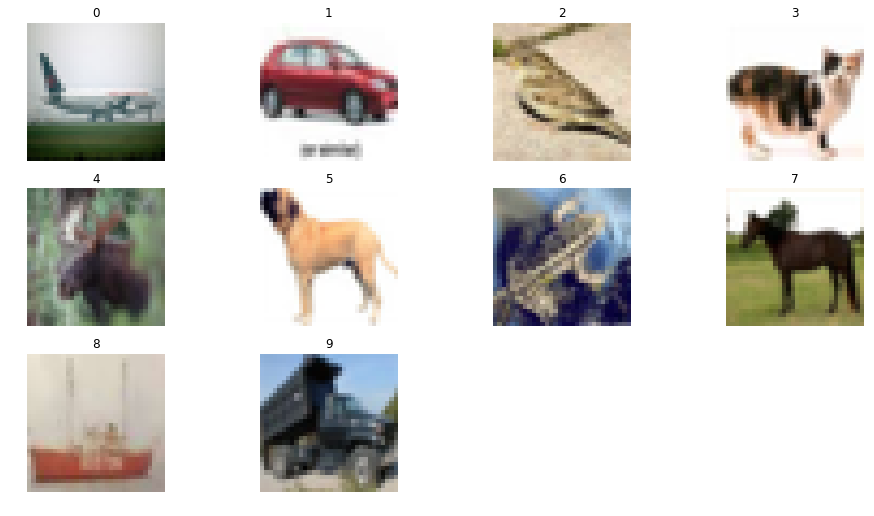

In [6]:
# Visualize an image of each feature out of the 43
plt.figure(figsize=(16, 33))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[100, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Augmentation

In [7]:
# Functions to augment data

# Randomly Translate the image
def translate(img, xlimit = 8, ylimit = 8):
    rows, cols, ch = img.shape
    tr_x = xlimit*np.random.uniform() - xlimit/2
    tr_y = ylimit*np.random.uniform() - ylimit/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    return cv2.warpAffine(img,Trans_M,(cols,rows))

# Add random rotation to the image
def rotate(img, a_limit = 20):
    rows, cols, ch = img.shape
    a_rot = np.random.uniform(a_limit) - a_limit/2
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),a_rot,1)
    return cv2.warpAffine(img,Rot_M,(cols,rows))

# Randomly Warp the image
def shear(img, shear_lim = 2):
    rows, cols, ch = img.shape
    poly1 = np.float32([[5,5],[20,5],[5,20]])
    
    vert1 = 5 + np.random.uniform()*shear_lim - shear_lim/2
    vert2 = 20 + np.random.uniform()*shear_lim - shear_lim/2
    
    poly2 = np.float32([[vert1,5],[vert2,vert1],[5,vert2]])
    
    shear_M = cv2.getAffineTransform(poly1, poly2)
    
    return cv2.warpAffine(img,shear_M,(cols,rows))

#Randomly change the image perspective
def perspective(img, pers_limit = 8):
    rows, cols, ch = img.shape
    poly1 = np.float32([[5,8], [5,24], [27,8], [27,24]])
    
    pnt1 = 8 + np.random.uniform()*pers_limit - pers_limit/2
    pnt2 = 24 + np.random.uniform()*pers_limit - pers_limit/2
    
    poly2 = np.float32([[5,8], [5, 24], [27,pnt1], [27, pnt2]])
    
    pers_M = cv2.getPerspectiveTransform(poly1, poly2)
    
    return cv2.warpPerspective(img,pers_M,(cols,rows))

# Add random brightness to the image
def brightness(img):
    img1 = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    random_bright = 0.9 + np.random.uniform()
    img1[:,:,2] = img[:,:,2]*random_bright
    img1 = cv2.cvtColor(img1,cv2.COLOR_HSV2RGB)
    return img1

# Change the contrast of the image randomly
def contrast(img):
    alpha = 1.1
    beta = 127.0 * (1.0 - alpha)
    
    img1 = cv2.multiply(img, np.array([alpha]))
    img1 = cv2.add(img1, np.array([beta]))
    
    return img1

# Sharpen Image
def sharp(img):
    gb = cv2.GaussianBlur(img, (3,3), 1.0)
    return cv2.addWeighted(img, 2.0, gb, -1.0, 0)

# Add random shadow or shade to simulate different light conditions
def shadow(img):
    y_t = 32*np.random.uniform()
    x_t = 0
    x_b = 32
    y_b = 32*np.random.uniform()
    
    img_hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*img_hls[:,:,1]
    
    X_mesh = np.mgrid[0:img.shape[0],0:img.shape[1]][0]
    Y_mesh = np.mgrid[0:img.shape[0],0:img.shape[1]][1]
    
    shadow_mask[((X_mesh - x_t)*(y_b - y_t) - (x_b - x_t) * (Y_mesh - y_t) >= 0)] = 1
   
    if np.random.randint(2)==1:
        random_light = 0.55
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        
        if np.random.randint(2)==1:
            img_hls[:,:,1][cond1] = img_hls[:,:,1][cond1] * random_light
        else:
            img_hls[:,:,1][cond0] = img_hls[:,:,1][cond0] * random_light    
    
    img = cv2.cvtColor(img_hls,cv2.COLOR_HLS2RGB)
    return img

def Histogram_Eq(img):
    img1 = img.copy()
    img1[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img1[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img1[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    
    return img1

def Histogram_Eq1(img):
    img1 = img.copy()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img1[:, :, 0] = clahe.apply(img[:, :, 0])
    img1[:, :, 1] = clahe.apply(img[:, :, 1])
    img1[:, :, 2] = clahe.apply(img[:, :, 2])
    
    return img1

def crop(img, mar = 3):
    c_x, c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(image_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

def transform(img):
    img1 = img.copy()
    img1 = crop(img1)
    img1 = sharp(img1)
    #img1 = contrast(img1)
    #img1 = shadow(img1)
    img1 = perspective(img1)
    img1 = translate(img1)
    img1 = rotate(img1)
    #img1 = shear(img1)
    
    return img1

def display(img, img1):
    plt.figure(figsize = (8,4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(img1)
    plt.title("Augmented Image")
    plt.show
    



Image Shape:  (26, 26, 3)


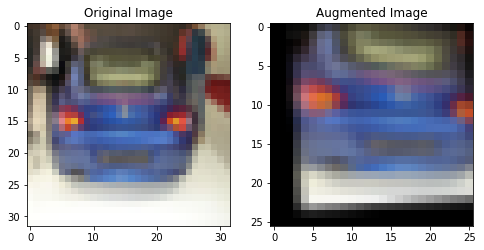

In [8]:
# Lets print the transform function output
x_selected = X_train[y_train == 1]
im=x_selected[20, :, :, :]
display(im, transform(im))
print("Image Shape: ", transform(im).shape)

### *Q1. Describe the preprocessing techniques used and why these techniques were chosen.*
*The above image shows that the original image has additional regions other than the traffic sign. So the image is cropped from 32x32x3 to 26x26x3 so that the focus is on the traffic sign. Moreover, it reduces the computation time by avoiding calculations on unwanted pixels.*

*Larger the dataset better is the model predictions. So, to increase the size of the dataset, several random transformations are applied to each image to generate augmented images. Augmenting images, also, makes the model robust for particular cases. Geometric transformations such as **translation()** and **rotation()** are applied to capture shifts in the image space. An image of a traffic sign could be at any viewing angle. So, to capture this **perspective()** and **affine()** transformations are applied to the image. Additionally, the image could be occluded by a shadow; so, a random shadow is added to few images. Finally, an unsharp mask and contrast adjustment improves the image visualization. First, equal amount of additional images were generated for each image i.e. 10. However, this caused some features to have very high number of images and some to have very low number of training images which affected predictions in the test data as the model was more biased toward features with more images. For example, the previous model predicted the 80 speed limit sign as 50. So, later, equal amount of images were generated for each feature which increased the test data prediction from 95.1% to 97.8%.*

*Furthermore, the Dataset is rescaled to -1.0 to 1.0 using the **minmax()** function described below and normalized for zero mean using the **normalize()** function. The image is not converted to color as color is an important factor in detecting traffic signs.*

*The image above shows the Orignal Image and the Augmented Image*

In [9]:
# Transform the given training set

X_train_aug = []
y_train_aug = []

def augment_data(n = 5):
    for i in range(n_train):
        img = X_train[i]
        X_train_aug.append(crop(img))
        y_train_aug.append(y_train[i])
        for j in range(n):
            X_train_aug.append(transform(img))
            y_train_aug.append(y_train[i])
    assert(len(X_train_aug) == len(y_train_aug))
    print("Augmented Data size: ", len(X_train_aug))

augment_data(3)

Augmented Data size:  140000


In [10]:
X_valid_aug = []
y_valid_aug = []
for i in range(n_valid):
    img = X_valid[i]
    X_valid_aug.append(crop(img))
    y_valid_aug.append(y_valid[i])

assert(len(X_valid_aug) == len(y_valid_aug))
print("Augmented Validation Set: ", len(X_valid_aug))

Augmented Validation Set:  15000


# Load hdf5 data
def h5_load(path):
    hdf5_path = path
    with tables.open_file(hdf5_path, mode = 'r') as train_data:
        X_train_aug = train_data.root.images[:]
        X_train_aug = np.array(X_train_aug_2, dtype = np.float32)
        train_data.close()


X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
hdf5("my_Augmented_Data.hdf5", X_train_aug, y_train_aug)
gc.collect()

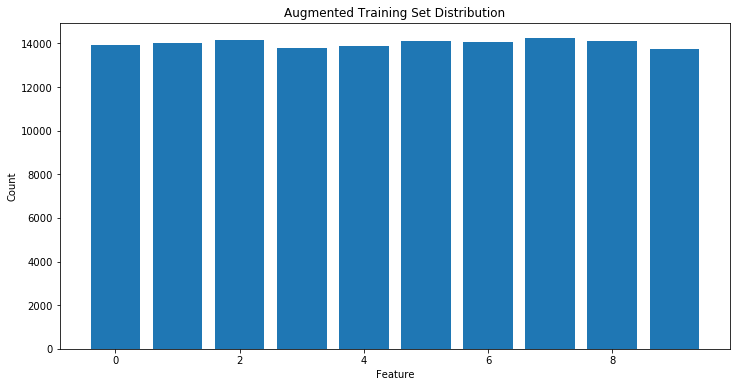

In [11]:
# Visualize Augmented set
unique, counts = np.unique(y_train_aug, return_counts = True)

plt.figure(figsize = (12,6))
plt.bar(unique, counts)
plt.title("Augmented Training Set Distribution")
plt.xlabel("Feature")
plt.ylabel("Count")


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


X_train_aug = np.around(np.array(X_train_aug, dtype = np.float32))
X_valid_aug = np.around(np.array(X_valid_aug, dtype = np.float32))



In [13]:
# Lets apply min_max scaler to prevent any single feature from dominating the result    
def minmax(img):
    x = np.full(img.shape, 127.5, dtype = img.dtype)
    return cv2.divide(cv2.add(img, -x), x)

In [14]:
for i, image in enumerate(X_train_aug):
    X_train_aug[i] = minmax(image)
X_train_aug = np.array(X_train_aug)

for i, image in enumerate(X_valid_aug):
    X_valid_aug[i] = minmax(image)
X_valid_aug = np.array(X_valid_aug)

In [15]:
def normalize(img, mean, std):
    muX = np.full(img.shape, mean, dtype = np.float32)   
    sigmaX = np.full(img.shape, std, dtype = np.float32)
    return cv2.divide(cv2.add(img, -muX), sigmaX)

In [16]:
mu1 = np.mean(X_train_aug)
mu2 = np.mean(X_valid_aug)
s1 = np.std(X_train_aug)
s2 = np.std(X_valid_aug)

for i, image in enumerate(X_train_aug):
    X_train_aug[i] = normalize(image, mu1, s1)
X_train_aug = np.array(X_train_aug)

for i, image in enumerate(X_valid_aug):
    X_valid_aug[i] = normalize(image, mu2, s2)
X_valid_aug = np.array(X_valid_aug)

s = X_train_aug[0:3000]
for i, image in enumerate(s):
    s[i] = minmax(image)
s = np.array(s)
print(s[1])
print(np.amax(s))
print(np.amin(s))

In [17]:
gc.collect()
image_shape_aug = X_train_aug[0].shape
print(np.mean(X_train_aug))
print(np.amin(X_train_aug))
print(np.amax(X_train_aug))

3.21619e-07
-1.48582
2.27494


### Model Architecture

### *Q2. Provide details of the characteristics and qualities of the architecture*
*The model consists of 9 layers with 3 convolution layers, 2 maxpool layers, 2 inception layers and 2 fully connected layers. The inception layer performs 4 operations and concatenates the result: a 1x1 convolution, a 1x1 convolution followed by a 3x3 convolution, a 1x1 convolution followed by a 5x5 convolution and a maxpool followed by a 1x1 convolution.*

|Layer                     |Input            |Output           |
|:-------------------------|:----------------|:----------------|
|1x1 Convolution with ReLU |26x26x3          |26x26x3          |
|5x5 Convolution with ReLU |26x26x3          |26x26x32         |
|Inception 1               |26x26x32         |26x26x256        |
|2x2 MaxPool 1             |26x26x256        |13x13x256        |
|Inception 2               |13x13x256        |13x13x512        |
|3x3 MaxPool 2             |13x13x512        |6x6x512          |
|1x1 Convolution Layer     |6x6x512          |6x6x256          |
|Fully Connected Layer 1   |9216             |512              |
|Output Layer              |512              |43               |

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

from tensorflow.contrib.layers import flatten

# Define mean and standard deviation
mu = 0
sigma = 0.1

# Define the convolution layer
def conv2d(x, kernel_w, d_in, d_out):
    wc = tf.Variable(tf.truncated_normal([kernel_w, kernel_w, d_in, d_out], mean = mu, stddev = sigma))
    bc = tf.Variable(tf.truncated_normal([d_out], mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, wc, strides = [1, 1, 1, 1], padding ='SAME')
    x = tf.nn.bias_add(x, bc)
    return x

# Define an activation layer
def active2d(x, kernel_w, d_in, d_out):
    wc = tf.Variable(tf.truncated_normal([kernel_w, kernel_w, d_in, d_out], mean = mu, stddev = sigma))
    bc = tf.Variable(tf.truncated_normal([d_out], mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, wc, strides = [1, 1, 1, 1], padding ='SAME')
    x = tf.nn.bias_add(x, bc)
    return tf.nn.relu(x)

# Define the Maxpool layer
def maxpool2d(x, k = 3, s = 1, pad = 'SAME'):
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, s, s, 1], padding = pad)

# Define a fully connected layer
def fc2d(x, d_in, d_out):
    wd = tf.Variable(tf.truncated_normal([d_in, d_out], mean = mu, stddev = sigma))
    bd = tf.Variable(tf.truncated_normal([d_out], mean = mu, stddev = sigma))
    x = tf.add(tf.matmul(x, wd), bd)
    x = tf.nn.relu(x)
    return tf.nn.dropout(x, keep_prob)

# Create an inception module
def inception(x, d_in, d_out):
    d1 = math.floor(d_out/4)
    d2 = math.floor(d_out/2)
    
    #Inception Module layer 1: 1x1 convolution
    conv1x1a = conv2d(x, 1, d_in, d_out)
    conv1x1a = tf.nn.dropout(conv1x1a, keep_prob)
    
    #Inception Module layer 2: 1x1 convolution -> 3x3 convolution -> 3x3 convolution
    conv1x1_relu1 = active2d(x, 1, d_in, d1)
    conv3x3 = conv2d(conv1x1_relu1, 3, d1, d2)
    conv3x3 = conv2d(conv3x3, 1, d2, d_out)
    conv3x3 = tf.nn.dropout(conv3x3, keep_prob)
    
    #Inception Module layer 3: 1x1 convolution -> 5x5 convolution -> 5x5 convolution
    conv1x1_relu2 = active2d(x, 1, d_in, d1)
    conv5x5 = conv2d(conv1x1_relu2, 5, d1, d2)
    conv5x5 = conv2d(conv5x5, 1, d2, d_out)
    conv5x5 = tf.nn.dropout(conv5x5, keep_prob)
    
    #Inception Module layer 4: Max Pooling -> 1x1 convolution -> 1x1 convolution
    maxpool = maxpool2d(x, 3, 1)
    convmax = conv2d(maxpool, 1, d_in, d2)
    convmax = conv2d(convmax, 1, d2, d_out)
    convmax = tf.nn.dropout(convmax, keep_prob)
    
    return tf.nn.relu(tf.concat([conv1x1a, conv3x3, conv5x5, convmax], 3))

def TrafficNet(x, out = 10):

    c1 = active2d(x, 1, 3, 3) #26x26x3
    c2 = active2d(c1, 5, 3, 32) #26x26x32
    inc1 = inception(c2, 32, 64) #26x26x256
    
    max1 = maxpool2d(inc1, 2, 2, pad = 'VALID') #13x13x256
    inc2 = inception(max1, 256, 128) #13x13x512
    
    max2 = maxpool2d(inc2, 3, 2, pad = 'VALID') #6x6x512
    c3 = conv2d(max2, 1, 512, 256) #6x6x256
    print(c1.shape)
    fc0 = flatten(c3)
    
    fc1 = fc2d(fc0, 256*6*6, 512) 
    
    fc2_W  = tf.Variable(tf.truncated_normal([512, out], mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.truncated_normal([out], mean = mu, stddev = sigma))
    
    logits = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Features and Labels
Train TrafficNet to classify traffic signs data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [19]:
t = np.array(image_shape_aug, dtype = np.int32)
x = tf.placeholder(tf.float32, (None,t[0],t[1],t[2]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

## Training Pipeline
Create a training pipeline that uses the model to classify traffic sign data.

In [20]:
# Define hyperparameters
EPOCHS = 10
BATCH_SIZE = 128
l_rate = 0.0004

# Define loss function and initialize the optimizer
logits = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = l_rate)
training_operation = optimizer.minimize(loss_operation)

(?, 26, 26, 3)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [21]:
# Define functions to calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

### *Q3. Describe how the model was trained*
*The model was trained using the Adam Optimizer. An initial value of Epochs = 15, Batch Size = 150, DropOut = 0.5 and Learning rate = 0.005 were chosen. Keeping other hyper parameters constant, the number of epochs was decreased and model performance was evaluated based on Loss and Accuracy with respect to the validation set. A final number of epoch = 10 was chosen which gave a prediction accuracy in the range of 96-98.5% on the validation set.*

*The model is finally tested on the test set that gave an accuracy of 97.8%.*

*Both the validation and test set were cropped, scaled between -1.0 to 1.0 and normalized for zero mean to match the training set.*

In [ ]:
# Start the tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training...")
    print()
    # Train the model
    for i in range(EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            tr, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        # Validate model accuracy   
        validation_accuracy = evaluate(X_valid_aug, y_valid_aug)
        print("EPOCH {} ...".format(i+1))
        print("Loss = {:.6f}".format(loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Trafficnet.ckpt')
    print("Model saved")

### *Q4. Describe the approach to finding a solution*
*The solution was started with the LeNet architecture as a base with the best hyperparameters found to be epoch = 15, learning rate = 0.0005 and batch_size = 150. However, the architecture with 3 convolution, 2 max pool and 2 fully connected layers. However, the network couldn't detect enough attributes and had a low accuracy: 86% to 89% on the validation set. The architecture was improved based on the GoogLeNet architecture. 2 inception modules were added to the model to improve accuracy. The lower inception module gave a sampling of low level features where as the higher inception module detected high level features. The batch size and the learning rate were kept constant but the no. of epochs were reduced to 10. The improved architecture gave an accuracy between 96% to 98.5%. In order to remove any bias toward any features, equal number of images were generated for each feature.*

In [ ]:
# Prepare test images
X_test_aug = []
y_test_aug = []
for i, image in enumerate(X_test):
    X_test_aug.append(crop(image))
    y_test_aug.append(y_test[i])
    
assert(len(X_test_aug) == len(y_test_aug))
print("Test Set Augmented")

In [ ]:
# Apply minmax to test set
X_test_aug = np.around(np.array(X_test_aug, dtype = np.float32))
for i, image in enumerate(X_test_aug):
    X_test_aug[i] = minmax(image)
X_test_aug = np.array(X_test_aug)

In [ ]:
# Normalize the test images
mu_test = np.mean(X_test_aug)
s_test = np.std(X_test_aug)
for i, image in enumerate(X_test_aug):
    X_test_aug[i] = normalize(image, mu_test, s_test)
X_test_aug = np.array(X_test_aug)

In [ ]:
# Calculate Model Accuracy on test images
with tf.Session() as sess:
    saver.restore(sess, './Trafficnet.ckpt')
    test_accuracy = evaluate(X_test_aug, y_test_aug)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### *Q5. Discuss particular qualities of the images or traffic signs in the image downloaded from the web*
*The traffic sign images from the web were chosen based on the number of images for the particular traffic sign available in the original training set. The features with low number of training images were downloaded such as roundabout mandatory, no vehicles, end of all speed and passing limits etc. Few commonly encountered signs such as Stop, Yield, speed limits etc. were also used to the model. Apart from these, two signs: roundabout mandatory, roadwork ahead; from a different country were added to test if the model recognises the common attributes and ignores the uncommon ones.*

In [ ]:
# Import the sign names from the CSV file
signs = []

with open('signnames.csv', 'rt') as sign_names:
    signs_n = csv.DictReader(sign_names, delimiter=',')
    for i in signs_n:
        signs.append((i['SignName']))

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
online_image_path = [image_path for image_path in glob.glob("./Online_Images_2/*")]
X_online = np.uint8(np.zeros((15,32,32,3)))

for i, path in enumerate(online_image_path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_CUBIC)
    b,g,r = cv2.split(image)
    image = cv2.merge([r,g,b])
    X_online[i] = image
plt.figure(figsize = (9, 15))
# Plot images
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(X_online[i]) 
    plt.title(i)
    plt.axis('off')
plt.show()
    

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def prediction(X, sess):
    predict = sess.run(tf.argmax(logits, 1), feed_dict = {x: X, keep_prob: 1.0})
    return predict

X_online_aug = []
for i, img in enumerate(X_online):
    X_online_aug.append(crop(img))

X_online_aug = np.around(np.array(X_online_aug, dtype = np.float32))

for i, img in enumerate(X_online_aug):
    X_online_aug[i] = minmax(img)
X_online_aug = np.array(X_online_aug)

for i, img in enumerate (X_online_aug):
    mu3 = np.mean(X_online_aug)
    s3 = np.std(X_online_aug)
    X_online_aug = normalize(X_online_aug, mu3, s3)
X_online_aug = np.array(X_online_aug)

print(np.min(X_online_aug))
print(np.max(X_online_aug))
print(np.mean(X_online_aug))


In [ ]:
with tf.Session() as sess:
    saver.restore(sess, './Trafficnet.ckpt')
    image_predictions = prediction(X_online_aug, sess)

In [ ]:
plt.figure(figsize = (12, 20))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.imshow(X_online[i]) 
    plt.title(signs[image_predictions[i]])
    plt.axis('off')
plt.show()
print(image_predictions)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
y_online = np.array([23, 40, 15, 11, 9, 25, 14, 33, 13, 37, 40, 25, 1, 5, 32])
n_online = len(image_predictions)
true_predictions = np.equal(image_predictions, y_online)
tp_online = np.count_nonzero(true_predictions)
accuracy_ol = tp_online / n_online * 100
print("Accuracy = {} %".format(accuracy_ol))

### *Q6. Discuss the performance of the model on the new images.*
*The model performed quite well on the new images. It was able to recognize all the german traffic signs. However, the model coundn't guess any of the two foreign traffic signs. The reason being that the model couldn't generalize to specific attributes of each feature. So, the model is well-fitted to similar data i.e. german traffic signs but over-fitted to partially matching data i.e. foreign signs. The model had a total accuracy of 86.67% on the web images: 100% accuracy on german traffic signs but 0% on similar foreign traffic signs*

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def softmax_predict(X, sess):
    soft = sess.run(tf.nn.softmax(logits), feed_dict = {x: X, keep_prob: 1.0})
    top5 = tf.nn.top_k(soft, k = 5)
    return sess.run(top5)

with tf.Session() as sess:
    saver.restore(sess, './Trafficnet.ckpt')
    top5_predictions = softmax_predict(X_online_aug, sess)

### *Q7. Discuss how certain or uncertain the model is of its predictions.*
*The model is quite certain about most german traffic sign images with the probability of the correct prediction being considerably higher in the top 5 softmax values. However, the model couldn't recognize the foreign traffic signs. This is because color is a major part of the prediction. So, the different coloured signs couldn't be recognised by the model. Apart from this, the model quite roughly predicts the 80 km/h sign. As discussed earlier, a previous model was unable to predict the 80 km/h sign and predicted it as 50 km/h due to small number of training images for 80 km/h. Even though, this model predicts the sign correctly, it is not certain about its predictions. Other speed limits also have a significant probability in the prediction. This may be due to the fact that the 80 km/h sign has several attributes common with the 50 km/h & 30 km/h sign, it looks like a distorted 120 km/h, 100 km/h sign and the training set has several corrupted, distorted images. A deeper neural network is required to separate the small differences between these speed limit signs.* 

In [ ]:
plt.figure(figsize = (18, 30))
for i in range(15):
    plt.subplot(15, 2, 2*i+1)
    plt.imshow(X_online[i])
    plt.title(i)
    plt.axis('off')
    plt.subplot(15, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top5_predictions.values[i, :])
    top5_signs = [signs[j] for j in top5_predictions.indices[i]]
    plt.yticks(np.arange(1, 6, 1), top5_signs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


## *Couldn't visualize the weights as the function below is having trouble accessing the weights within the model functions*

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")